# Transformações geométricas - Parte 1 do Projeto de Visão

Vamos gerar uma imagem de entrada com algumas coordenadas conhecidas.  Desta seção você só vai precisar das coordenadas dos pontos na imagem de entrada e na imagem de saída

In [248]:
import warnings;
with warnings.catch_warnings():
    warnings.simplefilter("ignore"); 
    import matplotlib.pyplot as plt

from matplotlib import colors


from sympy.solvers import solve
from sympy import Symbol
from sympy import Matrix, solve_linear_system
from sympy.abc import a, b, x, y
import cv2

import numpy as np
import pandas as pd
from sympy import symbols
from sympy.core.trace import Tr
#from sympy.matrices.matrices import Matrix

from IPython.core.display import display_pretty
from sympy.printing.latex import *

from sympy import init_printing; init_printing()
from sympy.interactive import printing
#printing.init_printing(use_latex=False) # Use this option if you don't have Latex Installed
printing.init_printing(use_latex=True)
#printing.init_printing(use_latex=mathjax)

from IPython.display import display

import sympy as sp
import math

%matplotlib inline



sp_x = 30
sp_y = 30
x_blocks = 6
y_blocks = 6

In [249]:
# Cria uma imagem RGB  em branco
blank = 255*np.ones((sp_x * x_blocks,sp_y*y_blocks,3), np.uint8)

In [250]:
# Coordenadas de entrada de alguns pontos
points = [[1,1],
          [5,1],
          [1,3],
          [3,3],
          [5,3],
          [1,5],
          [5,5]]

In [251]:
# Cores a usar para os pontos
point_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

## Coordenadas dos pontos na imagem de entrada

Este loop imprime as coordenadas.

As cores dos pontos servem para identificá-los

In [252]:
sp_x = 30 # x spacing
sp_y = 30 # y spacing
point_size = 5
print("Posição dos pontos: (x_entrada, y_entrada)")

for i in range(len(points)):
    point_color = [int(255*canal) for canal in colors.colorConverter.colors[point_colors[i]]]
    point_position = (sp_x*points[i][0], sp_y*points[i][1])
    print(point_position, point_color)
    cv2.circle(blank,point_position, point_size, point_color, -1)

Posição dos pontos: (x_entrada, y_entrada)
((30, 30), [255, 0, 0])
((150, 30), [0, 127, 0])
((30, 90), [0, 0, 255])
((90, 90), [0, 191, 191])
((150, 90), [191, 0, 191])
((30, 150), [191, 191, 0])
((150, 150), [0, 0, 0])


## Imagem de entrada

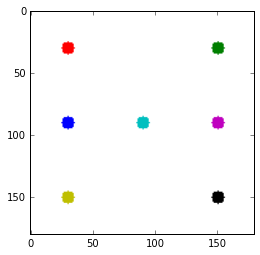

In [253]:
plt.imshow(blank)

Se precisar abrir a imagem fora deste *notebook*, use o arquivo `dots_pattern.png`


In [254]:
cv2.imwrite("dots_pattern.png", blank)

True

## Padrão de saída

Foi aplicada uma transformação à imagem de entrada, que gerou o seguinte padrão de saída:

In [255]:
saida = cv2.imread("patterns_transformed.png")

saida_rgb = cv2.cvtColor(saida, cv2.COLOR_BGR2RGB)

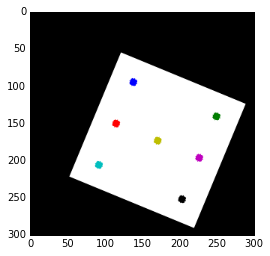

In [256]:
plt.imshow(saida_rgb)

Sabe-se que a imagem de saída é igual a uma combinação de rotações em torno de um ponto arbitrário e  redimensionamentos (escala) da imagem de entrada. Para simplificar, assuma que o redimensionamento é igual nos eixos $x$ e $y$

Cada ponto da imagem de saída está relacionado à sua posição na imagem de entrada pela seguinte transformação:

$$
\begin{pmatrix}
x_{saida} \\
y_{saida} \\
1
\end{pmatrix}
 = 
\begin{pmatrix}
   \alpha &\beta &(1-\alpha \cdot center.x - \beta \cdot center.y) \\
   -\beta & \alpha & \beta \cdot center.x + (1 - \alpha \cdot center.y) \\ 0 & 0 & 1
\end{pmatrix} \cdot \begin{pmatrix} x_{entrada} \\ y_{entrada} \\ 1 \end{pmatrix} 
$$

Na equação acima:

$\alpha = escala \cdot \cos(\theta)$ 

$\beta = escala \cdot \sin(\theta) $ 

$x_{entrada}$ é a posição $x$ de cada pixel na imagem de entrada

$y_{entrada}$ é a posição $y$ de cada pixel na imagem de entrada

$center$ é o centro de rotação

$x_{saída}$ é a coordenada $x$ do pixel na imagem de saída

$y_{saída}$ é a coordenada $y$ do pixel na imagem de saída


Com translação:

$$
\begin{pmatrix}
x_{saida} \\
y_{saida} \\
1
\end{pmatrix}
 =
\begin{pmatrix}
   \alpha &\beta &(1-\alpha \cdot center.x - \beta \cdot center.y) + t_x \\
   -\beta & \alpha & \beta \cdot center.x + (1 - \alpha \cdot center.y) + t_y \\ 0 & 0 & 1
\end{pmatrix} \cdot \begin{pmatrix} x_{entrada} \\ y_{entrada} \\ 1 \end{pmatrix}
$$



# Matrizes de transformação com rotação, translação e escala


Uma matriz de translação por uma distância $ [ x_t   y_t ]$ em 2D é:

$$
T = \begin{pmatrix} 1 & 0 & x_t \\
0 & 1 & y_t \\
0 & 0 & 1 
\end{pmatrix}
$$

Uma matriz de rotação por um ângulo $\theta$ é:

$$
R = \begin{pmatrix} \cos(\theta) & -\sin(\theta) & 0 \\
\sin(\theta) & \cos(\theta) & 0 \\
0 & 0 & 1 
\end{pmatrix}
$$

Uma matriz que aplica um fator de escala  $s$ igual nos eixos $x$ e $y$ é:


$$
S = \begin{pmatrix} s & 0  & 0 \\
0 & s & 0 \\
0 & 0 & 1 
\end{pmatrix}
$$


Uma transformação genérica, composta de rotação, escala e transação (nesta ordem) é dada por:

$$
M = T \cdot S \cdot R
$$

Ou seja:
$$
M = \begin{pmatrix} 1 & 0 & x_t \\
0 & 1 & y_t \\
0 & 0 & 1 
\end{pmatrix}
\cdot
\begin{pmatrix} \cos(\theta) & -\sin(\theta) & 0 \\
\sin(\theta) & \cos(\theta) & 0 \\
0 & 0 & 1 
\end{pmatrix}
\cdot
\begin{pmatrix} s & 0  & 0 \\
0 & s & 0 \\
0 & 0 & 1 
\end{pmatrix}
$$

Multiplicando as três matrizes, temos que uma transformação afim composta de rotação, escala e translação é:

$$
M = \begin{pmatrix} s\cdot\cos(\theta) & -s\cdot\sin(\theta) & x_t \\
-s\cdot\sin(\theta) & -s\cdot\cos(\theta) & y_t \\
0 & 0 & 1 
\end{pmatrix}
$$


Desta forma, um ponto de entrada representado por $( x_{i}, y_{i} ) $ será transformado num ponto de saída $(x_{saida}, y_{saida})$ quando multiplicado pela matrix $M$


$$
\begin{pmatrix}x_{saida} \\ y_{saida} \end{pmatrix} = \begin{pmatrix} s\cdot\cos(\theta) & -s\cdot\sin(\theta) & x_t \\
-s\cdot\sin(\theta) & -s\cdot\cos(\theta) & y_t \\
0 & 0 & 1 
\end{pmatrix} \cdot \begin{pmatrix} x_{i} \\ y_{i} \end{pmatrix} 
$$

Teremos, então:

$$
x_{saida} = x_{i} \cdot s \cdot \cos(\theta) - y_{i} \cdot s \cdot \sin(\theta) + x_t $$
e 
$$ y_{saida} = - x_{i} \cdot s \cdot \sin(\theta) - y_{i} \cdot s \cdot \cos(\theta) + y_t
$$

Por simplicidade, ao estimar uma transformação, ajuda trabalhar com as seguintes relações:

$\alpha =  s \cdot \cos(\theta)$

e 

$\beta = s \cdot \sin(\theta) $

E encarar a matriz da seguinte forma:


$$
\begin{pmatrix}x_{saida} \\ y_{saida} \end{pmatrix} = \begin{pmatrix} \alpha & -\beta & x_t \\
-\beta & -\alpha & y_t \\
0 & 0 & 1 
\end{pmatrix} \cdot \begin{pmatrix} x_{i} \\ y_{i} \end{pmatrix} 
$$



# Atividade 1

Responda (no IPython Notebook): 

1. Quantos graus de liberdade (variáveis) determinam a transformação acima?

2. Supondo que a transformação aplicada para transformar a imagem de entrada na imagem do arquivo `patterns_transformed.png` é desconhecida, é possível descobrir qual é esta transformação? Como?

3. Crie uma tabela para os 7 pontos de entrada fornecidos em que constem quais suas posições na imagem de entrada e depois quais suas posições após transformados, na imagem de saída.

4. Considerando o número de variáveis da matriz de transformação fornecida, de quantas correspondências $p_{entrada} \Rightarrow p_{saida}$ você precisa para descobrir qual é a matriz?

5. Por que poderia ser útil usar **mais** correspondências do que a resposta que você deu no item anterior?

6. Expanda a equação da transformação usando os pontos de entrada e saída de sua tabela até ter um sistema sobredeterminado. <font color=red> Reserve pelo menos 1 hora para esta atividade - trabalhoso </font>. Talvez você ache útil aprender a usar um *Computer Algebra System* para fazer isso, por exemplo o Sympy ou o Maxima.

7. A partir do sistema sobredeterminado que você encontrou no item anterior, resolva e estime qual é a transformação que foi usada para converter a imagem de entrada na imagem de saída. Você pode usar o método de *Least Squares* que está presente no *Scipy* ou o *RANSAC* da OpenCV, por exemplo.

8. Aplique a transformação à imagem de entrada e verifique se o resultado que obteve se assemelha à imagem de saída. A função da OpenCV que permite que você faça isso é a *cv2.warpAffine()* 

## Referências



[Shapiro and Shepard. Computer Vision. Seção 11.2, Capítulo 11](https://courses.cs.washington.edu/courses/cse576/book/ch11.pdf)

[http://docs.opencv.org/3.1.0/da/d6e/tutorial_py_geometric_transformations.html#gsc.tab=0](http://docs.opencv.org/3.1.0/da/d6e/tutorial_py_geometric_transformations.html#gsc.tab=0)



## RESPOSTAS:

1. Quantos graus de liberdade (variáveis) determinam a transformação acima?

Temos quatro graus de liberdade que determinam a transformação acima. Estes graus de liberdade são 4 variavéis:x da translação, y da translação, theta, escala. (translação,rotação e escala)

2. Supondo que a transformação aplicada para transformar a imagem de entrada na imagem do arquivo `patterns_transformed.png` é desconhecida, é possível descobrir qual é esta transformação? Como?

É possível descobrir qual é a transformação. Para descobrir, devemos inicialemnte escolher diversos pontos, em seguida montar um sistema sobredeterminado( obtendo mais equações do que icognitas e por final, através de um dos possiveis métodos(Método dos Mínimos Quadrados, RANSAC ou algum estimador do própio OpenCV, estimar os valores das incognitas da imagem original. 

3. Crie uma tabela para os 7 pontos de entrada fornecidos em que constem quais suas posições na imagem de entrada e depois quais suas posições após transformados, na imagem de saída.

In [257]:
tabela = pd.DataFrame({"Cor":["AMARELO","AZUL","PRETO","ROXO","TURQUESA","VERDE","VERMELHO"], "X_entrada":["30","30","150","150","90","150","30"], "Y_entrada":["150","90","150","90","90","30","30"],"X_saida":["92","114","202","226","170","248","137"], "Y_saida":["206","150","252","196","174","141","95"]})
tabela

#((30, 150), [191, 191, 0])#amarelo
#((30, 90), [0, 0, 255])#azul
#((150, 150), [0, 0, 0])#preto
#((150, 90), [191, 0, 191])#roxo
#((90, 90), [0, 191, 191])#turquesa
#((150, 30), [0, 127, 0])#verde
#((30, 30), [255, 0, 0])#vermelho



,Cor,X_entrada,X_saida,Y_entrada,Y_saida
0,AMARELO,30,92,150,206
1,AZUL,30,114,90,150
2,PRETO,150,202,150,252
3,ROXO,150,226,90,196
4,TURQUESA,90,170,90,174
5,VERDE,150,248,30,141
6,VERMELHO,30,137,30,95


4. Considerando o número de variáveis da matriz de transformação fornecida, de quantas correspondências $p_{entrada} \Rightarrow p_{saida}$ você precisa para descobrir qual é a matriz?

Para descobrir qual é a matriz precisamos de de duas correspondências $p_{entrada} \Rightarrow p_{saida}$. Cada ponto fornece dois valores, portanto dois pontos nos fornecerão quatro valores, o suficientes para descobrirmos os valores das incognitas α, β, x(translação), y(translação).

$ α= escala* cos \theta $

$β= escala* sin \theta$

5. Por que poderia ser útil usar **mais** correspondências do que a resposta que você deu no item anterior?


Os pixels dos pontos foram localizados de forma manual no photoshop. Como a análise foi"de olho"podem existir erros de imprecisão. Desta forma, ao utilizarmos mais pontos,  a precisão da matriz transformação será maior. 

6. Expanda a equação da transformação usando os pontos de entrada e saída de sua tabela até ter um sistema sobredeterminado. <font color=red> Reserve pelo menos 1 hora para esta atividade - trabalhoso </font>. Talvez você ache útil aprender a usar um *Computer Algebra System* para fazer isso, por exemplo o Sympy ou o Maxima.


In [258]:
alpha, beta, t_x, t_y =  sp.symbols("alpha, beta, t_x, t_y")
def make_column_point(x, y):
    return sp.Matrix([[x],[y],[1]])

ponto_entra_amarelo = make_column_point(30, 150)
ponto_entra_azul = make_column_point(30, 90)
ponto_entra_preto = make_column_point(150, 150)
ponto_entra_roxo = make_column_point(150, 90)
ponto_entra_turquesa = make_column_point(90, 90)
ponto_entra_verde = make_column_point(150, 150)
ponto_entra_vermelho = make_column_point(30, 30)

pontos_entrada = [ponto_entra_amarelo, ponto_entra_azul, ponto_entra_preto,ponto_entra_roxo, ponto_entra_turquesa, ponto_entra_verde, ponto_entra_vermelho]

ponto_sai_amarelo = make_column_point(92, 206)
ponto_sai_azul = make_column_point(114, 150)
ponto_sai_preto = make_column_point(202, 252)
ponto_sai_roxo = make_column_point(226, 196)
ponto_sai_turquesa = make_column_point(170, 174)
ponto_sai_verde = make_column_point(248, 141)
ponto_sai_vermelho = make_column_point(137, 95)

pontos_saida = [ponto_sai_amarelo, ponto_sai_azul, ponto_sai_preto,ponto_sai_roxo, ponto_sai_turquesa, ponto_sai_verde, ponto_sai_vermelho]


#Matriz= np.matrix ([[1],[2],[3]])
#Matriz

#### Pontos de Entrada

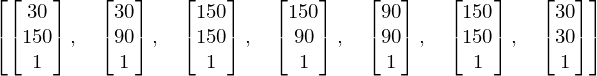

In [259]:
pontos_entrada

#### Pontos de Saída 

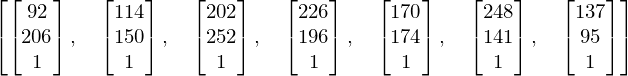

In [260]:
pontos_saida

In [261]:
M = sp.Matrix([[alpha, -beta, t_x],[-beta, -alpha, t_y],[0, 0, 1]])

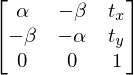

In [262]:
M

In [263]:
equations = []
system_eq = [] 
left_side = [] 

for p in pontos_entrada:
    produto = M*p
    equations.append(produto)

print("Equaçōes do sistema sobredeterminado (todas as equaçōes são iguais a 0):")
    
        
for i in range(len(equations)):
    for j in range(len(equations[i][:-1])):# -1 excludes the homogeneous coordinate (extra 1 at the end)
        eq = equations[i][j]-pontos_saida[i][j]
        left_side.append(equations[i][j])
        system_eq.append(eq)

for equation in system_eq:
    display(equation)

Equaçōes do sistema sobredeterminado (todas as equaçōes são iguais a 0):


7. A partir do sistema sobredeterminado que você encontrou no item anterior, resolva e estime qual é a transformação que foi usada para converter a imagem de entrada na imagem de saída. Você pode usar o método de *Least Squares* que está presente no *Scipy* ou o *RANSAC* da OpenCV, por exemplo.

In [264]:
matriz_alpha= np.array([[30,-30,1,0],[-30,-30,0,1],[30,-90,1,0],[-90,-30,0,1],[30,-150,1,0],
    [-150,-30,0,1],[90,-90,1,0],[-90,-90,0,1],[150,-150,1,0],[-150,-150,0,1],[150,-90,1,0],
    [-90,-150,0,1],[150,-150,1,0],[-150,-150,0,1]])

matriz_beta = np.array([135,95,115,150,90,205,170,170,250,140,225,195,200,250])

solucao_matriz = np.linalg.lstsq(matriz_alpha, matriz_beta)

alpha= (solucao_matriz[0][0])
matriz_beta = (solucao_matriz[0][1])
tx = (solucao_matriz[0][2])
ty = (solucao_matriz[0][3])

theta_radius = math.atan(matriz_beta/alpha) #em radiano
theta_graus = math.degrees(theta_radius) #em graus 

escala = (alpha/math.cos(theta_radius))
print("Theta em Graus =" , theta_graus)
print("Escala =" ,escala)
print("Translação x =" ,tx)
print("Translação y =" ,ty)
print("Matriz Solucionada =" ,solucao_matriz)

('Theta em Graus =', -48.32864999171816)
('Escala =', 0.47667276972251177)
('Transla\xc3\xa7\xc3\xa3o x =', 102.61363636363933)
('Transla\xc3\xa7\xc3\xa3o y =', 174.05303030303253)
('Matriz Solucionada =', (array([   0.31691919,   -0.35606061,  102.61363636,  174.0530303 ]), array([ 28401.89393939]), 4, array([ 413.5282464 ,  413.5282464 ,    1.17874005,    1.17874005])))


In [265]:
S= Matrix((
    (30,-30,1,0,135),
    (-30,-30,0,1,95),
    (30,-90,1,0,115),
    (-90,-30,0,1,150),
    ))


               
resolucao = solve_linear_system(S, alpha, matriz_beta, x, y)


theta_radius = math.atan(resolucao[matriz_beta]/resolucao[alpha]) #em radiano
theta_graus = math.degrees(theta_radius) #em graus 
tx_m2= 345/2
ty_m2= 155/2

escala = (resolucao[alpha]/math.cos(theta_radius))

print("Theta em Graus =" , theta_graus)
print("Escala =" ,escala)
print("Translação x =" ,tx_m2)
print("Translação y =" ,ty_m2)
print("Matriz Solucionada =" ,solucao_matriz)



('Theta em Graus =', -19.98310652189998)
('Escala =', -0.975391659226635)
('Transla\xc3\xa7\xc3\xa3o x =', 172)
('Transla\xc3\xa7\xc3\xa3o y =', 77)
('Matriz Solucionada =', (array([   0.31691919,   -0.35606061,  102.61363636,  174.0530303 ]), array([ 28401.89393939]), 4, array([ 413.5282464 ,  413.5282464 ,    1.17874005,    1.17874005])))


In [266]:
S2= Matrix((
    (30,-150,1,0,90),
    (-150,-30,0,1,205),
    (150,-150,1,0,250),
    (-150,-150,0,1,140),
    ))

resolucao2 = solve_linear_system(S2, alpha, matriz_beta, x, y)

theta_radius = math.atan(resolucao2[matriz_beta]/resolucao2[alpha]) 
theta_graus = math.degrees(theta_radius)  

tx_m3= 525/4
ty_m3= 1685/4
escala = (resolucao2[alpha]/math.cos(theta_radius))



print("Theta em Graus =" , theta_graus)
print("Escala =" ,escala)
print("Translação x =" ,tx_m3)
print("Translação y =" ,ty_m3)
print("Matriz Solucionada =" ,solucao_matriz)



('Theta em Graus =', 22.109448343751673)
('Escala =', 1.43915966993088)
('Transla\xc3\xa7\xc3\xa3o x =', 131)
('Transla\xc3\xa7\xc3\xa3o y =', 421)
('Matriz Solucionada =', (array([   0.31691919,   -0.35606061,  102.61363636,  174.0530303 ]), array([ 28401.89393939]), 4, array([ 413.5282464 ,  413.5282464 ,    1.17874005,    1.17874005])))


In [267]:
S3= Matrix((
    (90,-90,1,0,170),
    (-90,-90,0,1,170),
    (150,-150,1,0,250),
    (-150,-150,0,1,140),
    ))

resolucao3 = solve_linear_system(S3, alpha, matriz_beta, x, y)

theta_radius = math.atan(resolucao3[matriz_beta]/resolucao3[alpha]) #em radiano
theta_graus = math.degrees(theta_radius) #em graus 
tx_m4=resolucao3[x]
ty_m4=resolucao3[y]
escala = (resolucao3[alpha]/math.cos(theta_radius))

print("Theta em Graus =" , theta_graus)
print("Escala =" ,escala)
print("Translação x =" ,tx_m3)
print("Translação y =" ,ty_m3)
print("Matriz Solucionada =" ,solucao_matriz)


('Theta em Graus =', -24.443954780416536)
('Escala =', 1.00692049779955)
('Transla\xc3\xa7\xc3\xa3o x =', 131)
('Transla\xc3\xa7\xc3\xa3o y =', 421)
('Matriz Solucionada =', (array([   0.31691919,   -0.35606061,  102.61363636,  174.0530303 ]), array([ 28401.89393939]), 4, array([ 413.5282464 ,  413.5282464 ,    1.17874005,    1.17874005])))


8. Aplique a transformação à imagem de entrada e verifique se o resultado que obteve se assemelha à imagem de saída. A função da OpenCV que permite que você faça isso é a *cv2.warpAffine()*

In [268]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

img = blank
rows,cols = img.shape[:2]

# Source points
srcTri = np.array([(0,0),(cols-1,0),(0,rows-1)], np.float32)

# Corresponding Destination Points. Remember, both sets are of float32 type
dstTri = np.array([(cols*0.0,rows*0.33),(cols*0.85,rows*0.25), (cols*0.15,rows*0.7)],np.float32)

# Affine Transformation
warp_mat = cv2.getAffineTransform(srcTri,dstTri)   # Generating affine transform matrix of size 2x3
dst = cv2.warpAffine(img,warp_mat,(cols,rows))     # Now transform the image, notice dst_size=(cols,rows), not (rows,cols)

# Image Rotation
center = (cols/2,rows/2)                           # Center point about which image is transformed
angle = -50.0                                      # Angle, remember negative angle denotes clockwise rotation
scale = 0.6                                        # Isotropic scale factor.

rot_mat = cv2.getRotationMatrix2D(center,angle,scale) # Rotation matrix generated
dst_rot = cv2.warpAffine(dst,rot_mat,(cols,rows))     # Now transform the image wrt rotation matrix

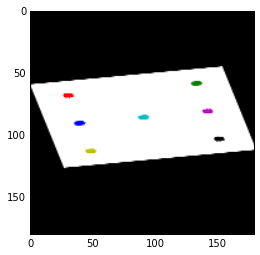

In [269]:
plt.imshow(dst)

In [270]:
warp_mat1 = np.matrix([[alpha,-matriz_beta,tx],[-matriz_beta,-alpha,ty]])   # Generating affine transform matrix of size 2x3
dst1 = cv2.warpAffine(img,warp_mat,(cols,rows))     # Now transform the image, notice dst_size=(cols,rows), not (rows,cols)

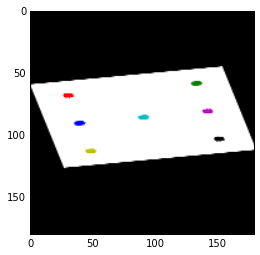

In [271]:
plt.imshow(dst1)

In [272]:
warp_mat1 = np.array([[float(resolucao3[alpha]), float(-resolucao[matriz_beta]),float(resolucao3[x])], [float(-resolucao[matriz_beta]),float(-resolucao3[alpha]),float(resolucao3[y])]])   # Generating affine transform matrix of size 2x3
dst2 = cv2.warpAffine(img,warp_mat1,(cols,rows))

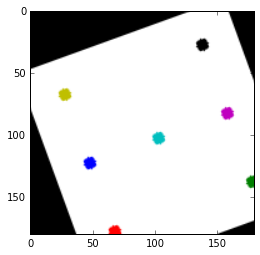

In [273]:
plt.imshow(dst2)